In [ ]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()

Długość skrzydła P (cm) female: mean=31.46, std=0.63, cv=0.02
Długość skrzydła P (cm) male: mean=32.73, std=0.86, cv=0.03
Mann-Whitney 'u' Długość skrzydła P (cm) by gender: pvalue=0.01
Saving plot to 'images/Długość skrzydła P (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość skrzydła P (cm)'>

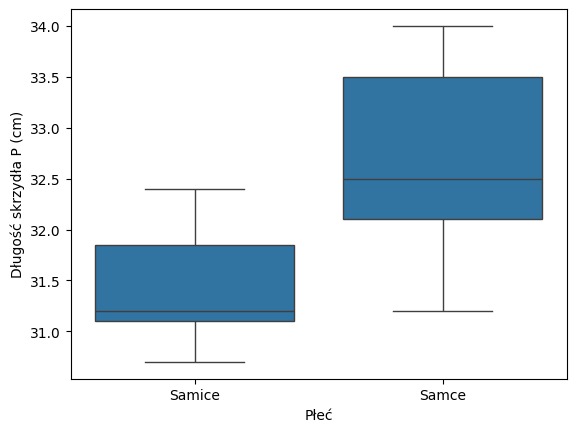

In [2]:
ds.compare_by_gender(x="Długość skrzydła P (cm)")

Saving plot to 'images/All corelations both genders.png'


<Axes: >

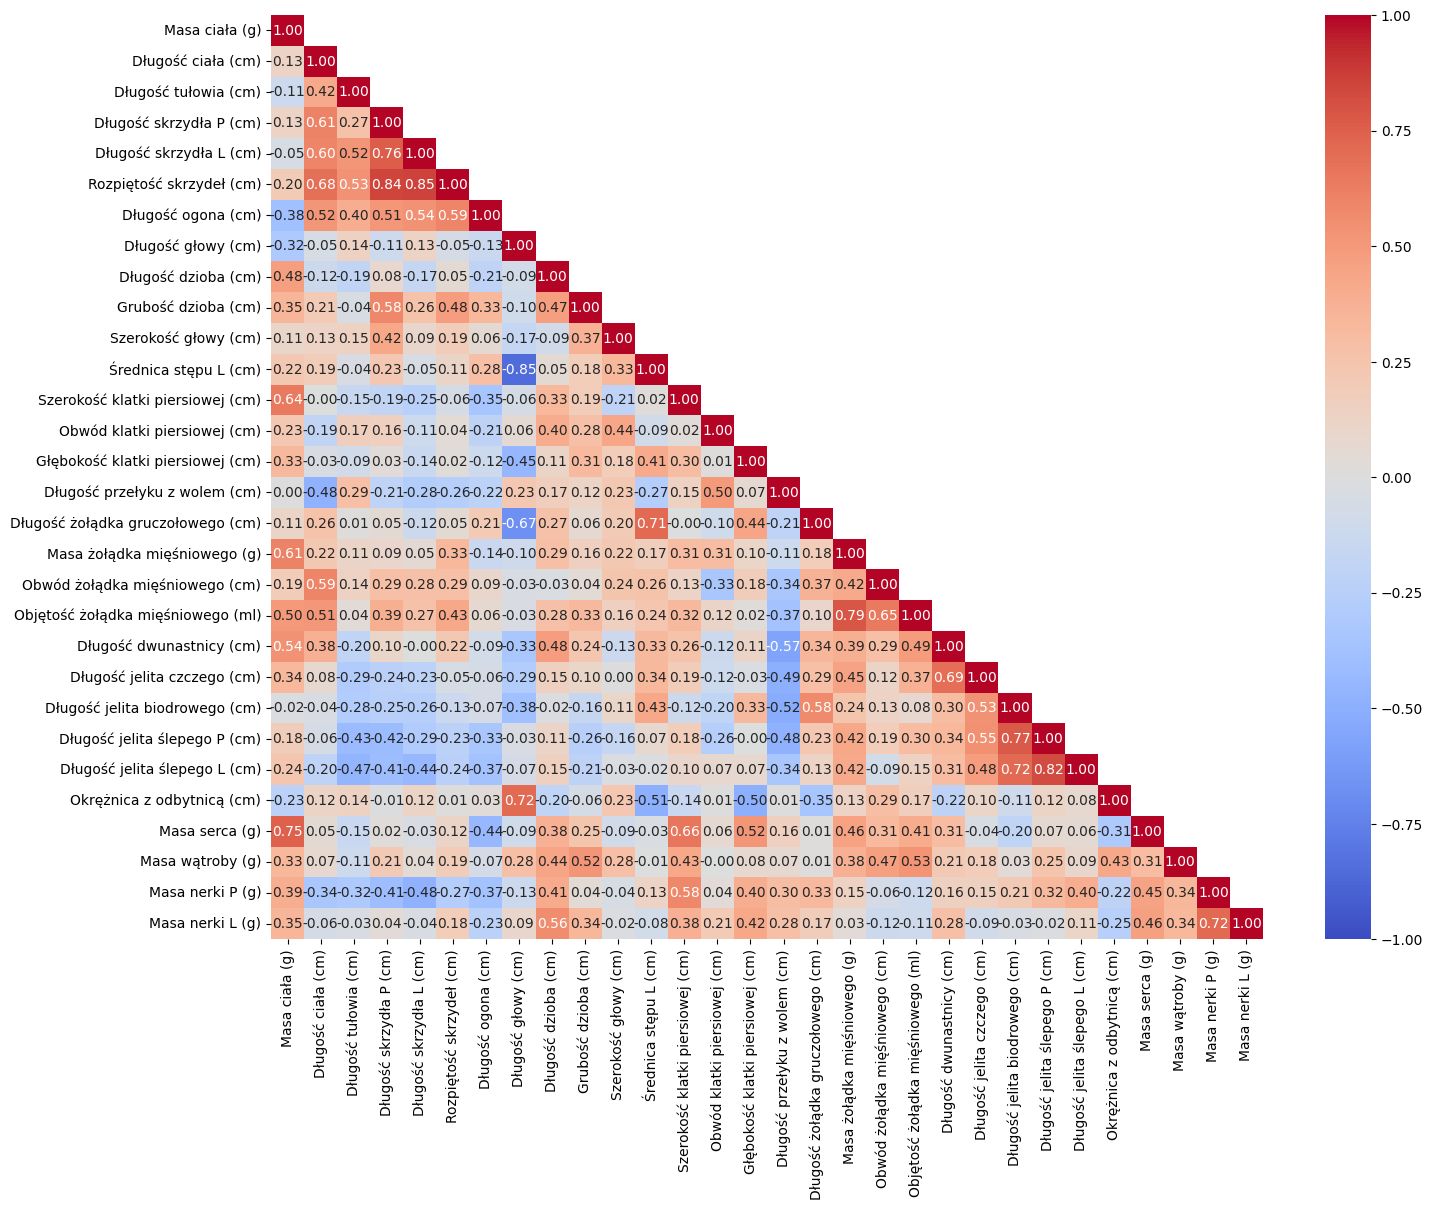

In [3]:
ds.corr_heatmap(ds.data_cols, ds.data_cols,"All corelations both genders")

Saving plot to 'images/All corelations Samice.png'


<Axes: >

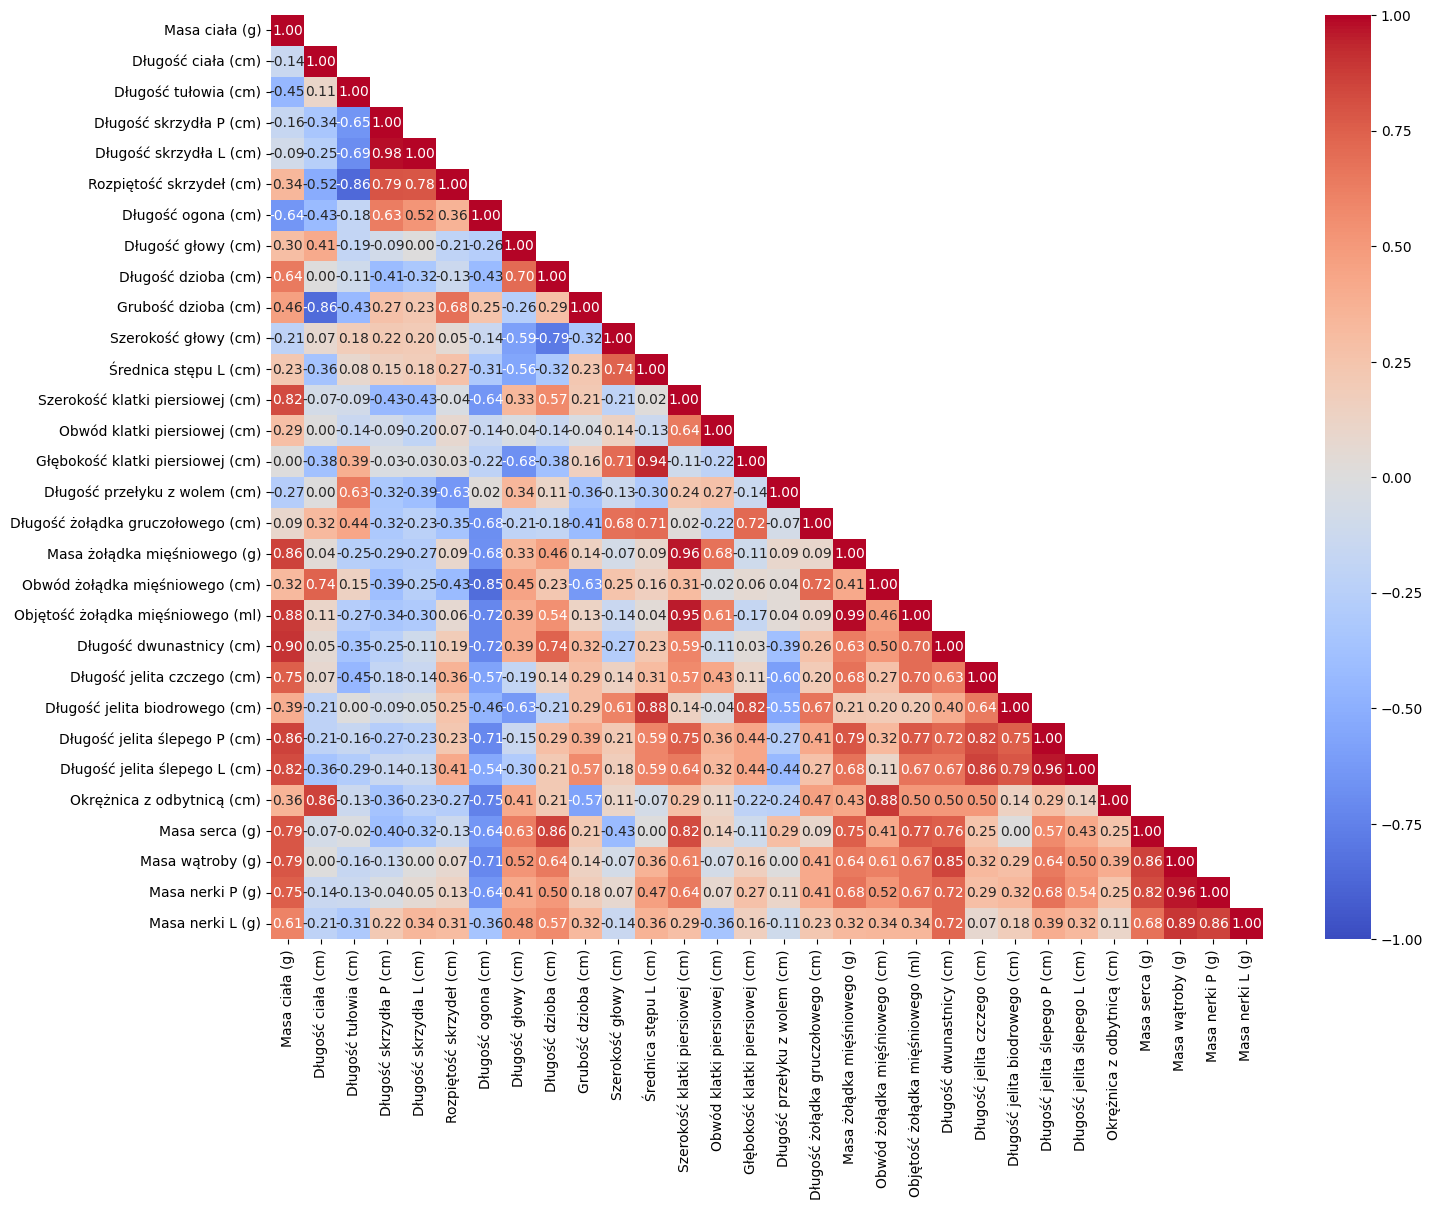

In [4]:
ds.corr_heatmap(ds.df["Płeć"] == "Samice", ds.data_cols,"All corelations Samice")

Saving plot to 'images/All corelations Samce.png'


<Axes: >

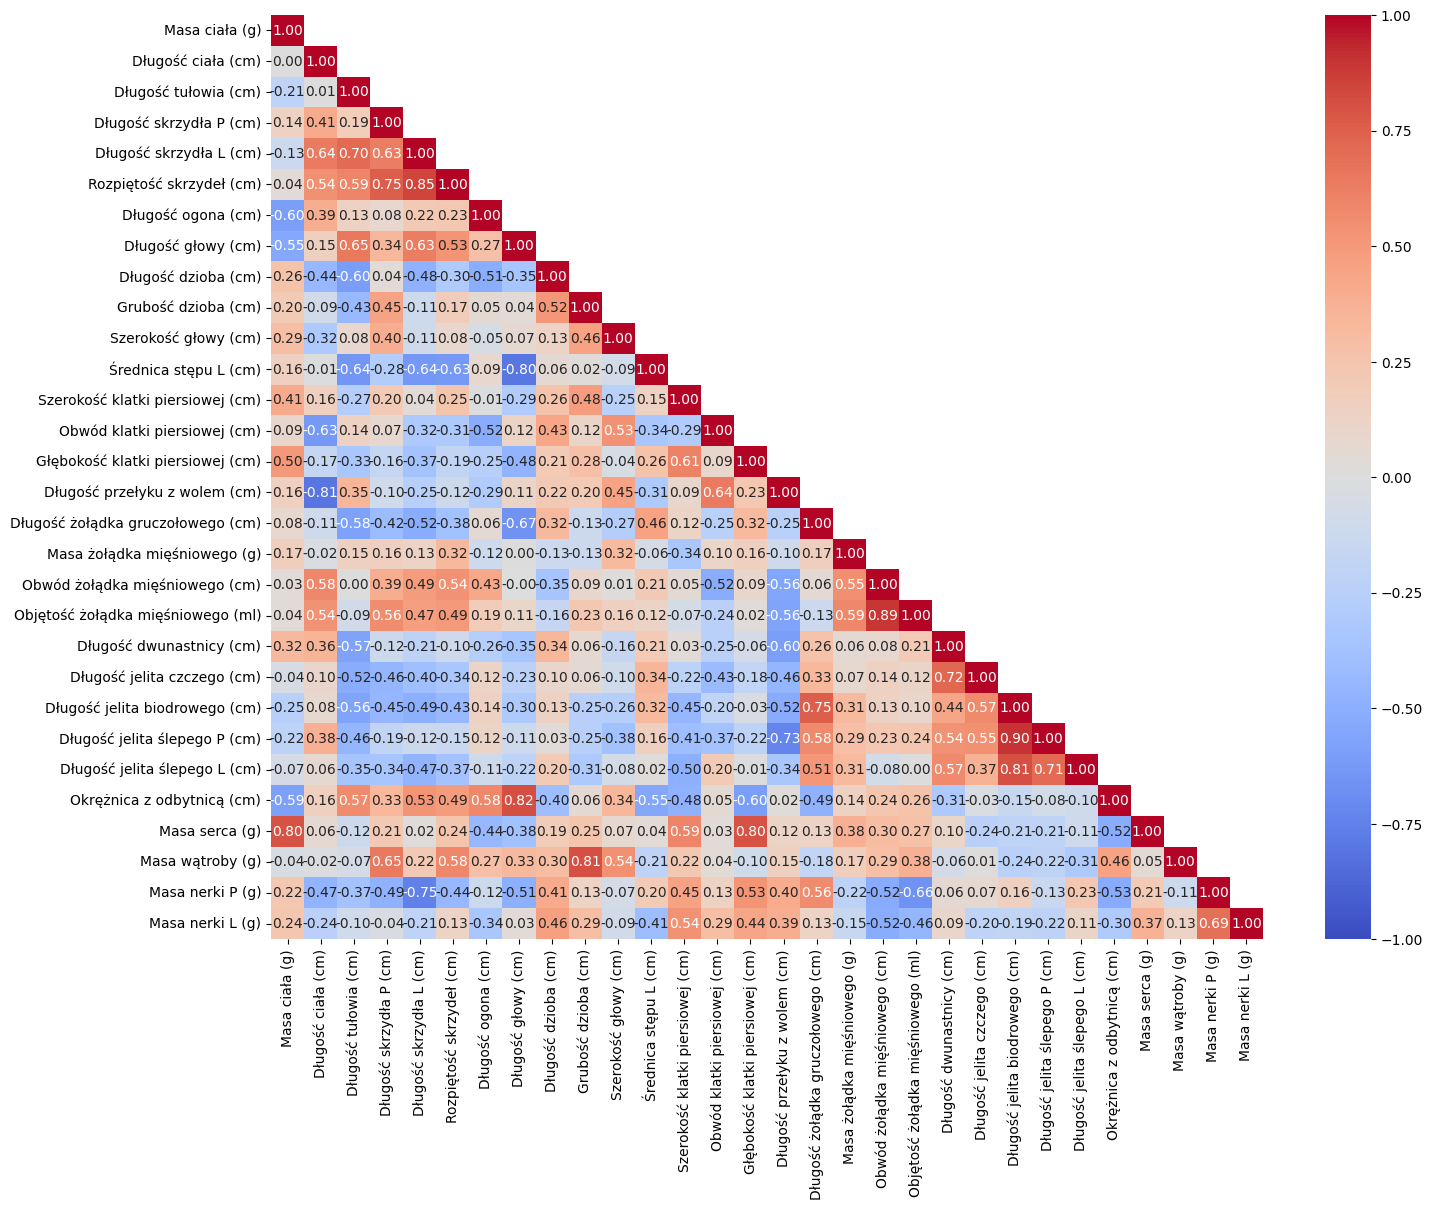

In [5]:
ds.corr_heatmap(ds.df["Płeć"] == "Samce", ds.data_cols,"All corelations Samce")

Masa ciała (g)
Długość ciała (cm)
Długość tułowia (cm)
Długość skrzydła P (cm)
Długość skrzydła L (cm)
Rozpiętość skrzydeł (cm)
Długość ogona (cm)
Długość głowy (cm)
Długość dzioba (cm)
Grubość dzioba (cm)
Szerokość głowy (cm)
Średnica stępu L (cm)
Szerokość klatki piersiowej (cm)
Obwód klatki piersiowej (cm)
Głębokość klatki piersiowej (cm)
Długość przełyku z wolem (cm)
Długość żołądka gruczołowego (cm)
Masa żołądka mięśniowego (g)
Obwód żołądka mięśniowego (cm)
Objętość żołądka mięśniowego (ml)
Długość dwunastnicy (cm)
Długość jelita czczego (cm)
Długość jelita biodrowego (cm)
Długość jelita ślepego P (cm)
Długość jelita ślepego L (cm)
Okrężnica z odbytnicą (cm)
Masa serca (g)
Masa wątroby (g)
Masa nerki P (g)
Masa nerki L (g)


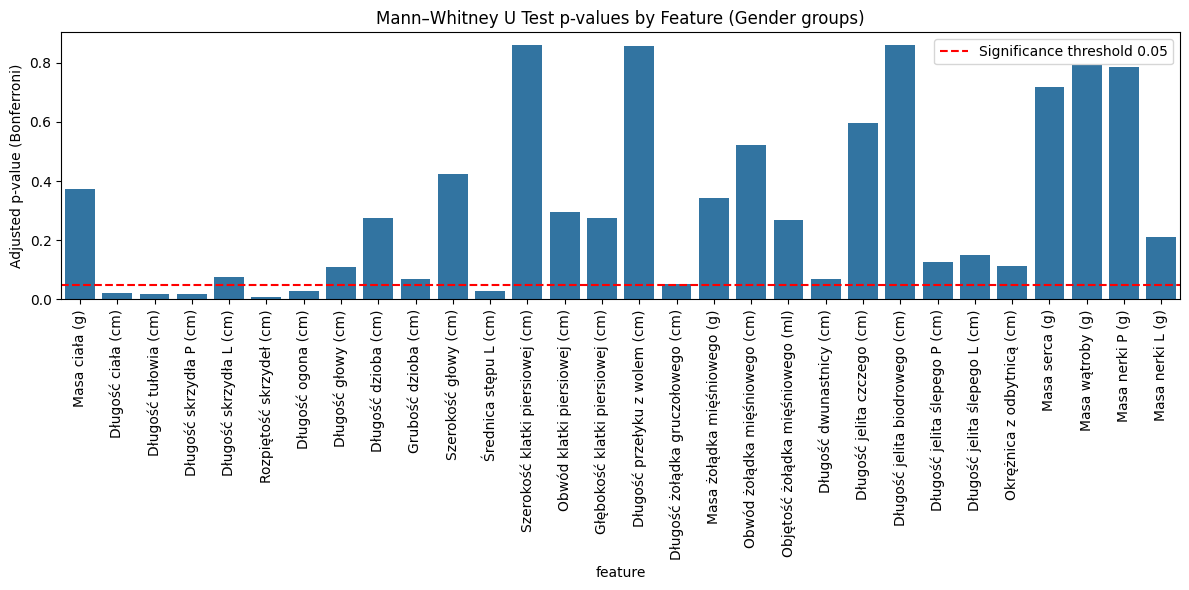

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

# Assuming df: rows=samples, columns=features
# gender: Series aligned with df.index, values 'male'/'female'

pvals = []
features = []
df = ds.df.dropna()
for col in ds.data_cols:
    print(col)
    group1 = df[df["Płeć"] == "Samice"][col]
    group2 = df[df["Płeć"] == "Samce"][col]

    if len(group1) > 0 and len(group2) > 0:
        _, p = mannwhitneyu(group1, group2, alternative="two-sided")
    else:
        p = None
    if isinstance(p, list):
        p = p[0]
    pvals.append(p)
    features.append(col)

pvals_df = pd.DataFrame({"feature": features, "pvalue": pvals})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="feature", y="pvalue", data=pvals_df)
plt.xticks(rotation=90)
plt.ylabel("Adjusted p-value (Bonferroni)")
plt.title("Mann–Whitney U Test p-values by Feature (Gender groups)")
plt.axhline(0.05, color="red", linestyle="--", label="Significance threshold 0.05")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
pvals_df

,feature,pvalue
0,Masa ciała (g),0.374937
1,Długość ciała (cm),0.023420
2,Długość tułowia (cm),0.018114
3,Długość skrzydła P (cm),0.018114
4,Długość skrzydła L (cm),0.075859
5,Rozpiętość skrzydeł (cm),0.009546
6,Długość ogona (cm),0.029399
7,Długość głowy (cm),0.108325
8,Długość dzioba (cm),0.276877
9,Grubość dzioba (cm),0.069945


In [15]:
pvals_df.to_excel("pvals.xlsx")